In [1]:
import tensorflow as tf
from sklearn.svm import SVC as SVM
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import  ListedColormap

import data
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
NUM_EXAMPLES = 10
CLASSES = 3
DISTRIBUTIONS = 6
SEED = 103

In [3]:
class KSVMWrap(object):
    """
        Wrapper class for SVM.
    """
    def __init__(self, X, Y_, param_svm_c=1.0, kernel='rbf', param_svm_gamma='auto'):
        self.svm = SVM(C=param_svm_c, kernel=kernel, gamma=param_svm_gamma)
        self.svm.fit(X, Y_)

    def predict(self, X):
        return self.svm.predict(X)

    def eval_perf(self, Y, Y_):
        # needed to compute scores of our model
        # 'weighted' takes into consideration labels imbalance
        if max(int(max(Y_) + 1), int(max(Y) + 1)) == 2:
            average = 'binary'
        else:
            average = 'weighted'

        accuracy = accuracy_score(Y_, Y)
        precision = precision_score(Y_, Y, average=average)
        recall = recall_score(Y_, Y, average=average)
        f1 = f1_score(Y_, Y, average=average)

        print("Accuracy: {0:.3f}\n"
              "Precision: {1:.3f}\n"
              "Recall: {2:.3f}\n"
              "F1: {3:.3f} ".format(accuracy, precision, recall, f1))

    def support(self):
        # return indices
        return self.svm.support_

In [4]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(SEED)

# instanciraj podatke X i labele Yoh_
X, Y_ = data.sample_gmm_2d(DISTRIBUTIONS, CLASSES, NUM_EXAMPLES)

In [5]:
ksvmwrap = KSVMWrap(X, Y_)
ksvmwrap_linear = KSVMWrap(X, Y_, kernel='linear')

/home/dreyus95/Python/tf_environments/tf3/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
preds = ksvmwrap.predict(X)
preds_linear = ksvmwrap_linear.predict(X)

In [7]:
print("RBF:")
ksvmwrap.eval_perf(preds, Y_.flatten())

print("\nLINEAR:")
ksvmwrap_linear.eval_perf(preds_linear, Y_.flatten())

RBF:
Accuracy: 0.933
Precision: 0.936
Recall: 0.933
F1: 0.933 

LINEAR:
Accuracy: 0.717
Precision: 0.735
Recall: 0.717
F1: 0.716 


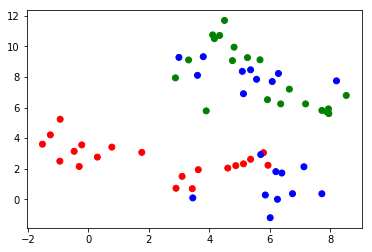

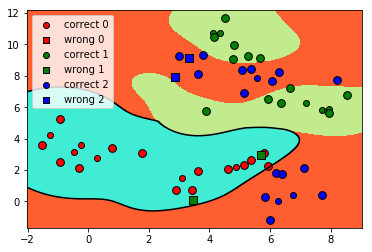

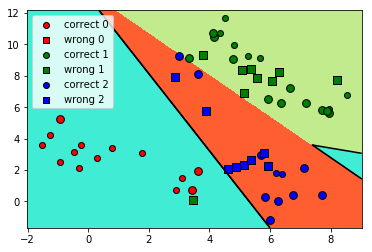

In [8]:
colors = ['red', 'green', 'blue']
plt.scatter(X[:, 0], X[:, 1], c=Y_.flatten(), cmap=ListedColormap(colors))
plt.show()

data.plot_decision_boundary(X, lambda x: ksvmwrap.predict(x))
data.graph_data(X, Y_, preds, special=ksvmwrap.support())

data.plot_decision_boundary(X, lambda x: ksvmwrap_linear.predict(x))
data.graph_data(X, Y_, preds_linear, special=ksvmwrap_linear.support())

In [9]:
SEED2 = 118

In [10]:
np.random.seed(SEED2)
X2, Y_2 = data.sample_gmm_2d(DISTRIBUTIONS, CLASSES, NUM_EXAMPLES)

In [11]:
ksvmwrap2 = KSVMWrap(X2, Y_2)
ksvmwrap2_linear = KSVMWrap(X2, Y_2, kernel='linear')

/home/dreyus95/Python/tf_environments/tf3/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
preds2 = ksvmwrap2.predict(X2)
preds2_linear = ksvmwrap2_linear.predict(X2)

In [13]:
print("RBF:")
ksvmwrap2.eval_perf(preds2, Y_2.flatten())

print("\nLINEAR:")
ksvmwrap2_linear.eval_perf(preds2_linear, Y_2.flatten())

RBF:
Accuracy: 0.933
Precision: 0.941
Recall: 0.933
F1: 0.932 

LINEAR:
Accuracy: 0.817
Precision: 0.866
Recall: 0.817
F1: 0.807 


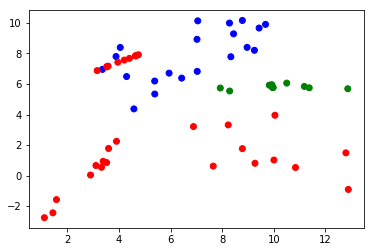

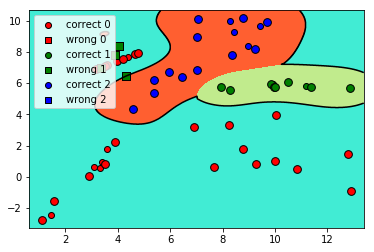

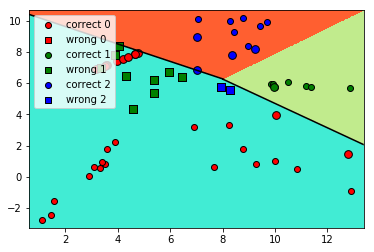

In [14]:
plt.scatter(X2[:, 0], X2[:, 1], c=Y_2.flatten(), cmap=ListedColormap(colors))
plt.show()

data.plot_decision_boundary(X2, lambda x: ksvmwrap2.predict(x))
data.graph_data(X2, Y_2, preds2, special=ksvmwrap2.support())

data.plot_decision_boundary(X2, lambda x: ksvmwrap2_linear.predict(x))
data.graph_data(X2, Y_2, preds2_linear, special=ksvmwrap2_linear.support())